In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('210053-data.csv')

c:\Users\Huy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (0,1,2,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data['Profit'] = (data['Sale_Price'] - data['Retail_Price']) #Create Profit column represent profit of each sale
data['Profit_Percent'] = (data['Profit']*100/data['Retail_Price']) #Create Profit_Percent representing the margin of the sale 


In [4]:
def rating(profit_per): #Function to rate the margin quality based on the Profit_Percent values 
    
    if profit_per < 10:
        return 'Poor'
    elif profit_per <= 20:
        return 'Healthy'
    elif profit_per >= 20:
        return 'High'
        

In [5]:
data.isna().sum() #Total of NA values (In this case these parts of the dataset were just all blanks)

Order_Date        948619
Brand             948619
Sneaker_Name      948619
Sale_Price        948618
Retail_Price      948619
Release Date      948619
Shoe_Size         948619
Buyer_Region      948619
Profit            948619
Profit_Percent    948619
dtype: int64

In [6]:
data.duplicated().sum() #Total of duplicated values (In this case these parts of the dataset were just all blanks)

951457

In [7]:
data1 = data.dropna()
data1 = data1.drop_duplicates()
data1.isna().sum()

#Remove all of the "blanks"

Order_Date        0
Brand             0
Sneaker_Name      0
Sale_Price        0
Retail_Price      0
Release Date      0
Shoe_Size         0
Buyer_Region      0
Profit            0
Profit_Percent    0
dtype: int64

In [8]:
data1['Rating_Profit'] = data['Profit_Percent'].apply(rating) #Apply the rating function to create a new column, rating each transaction

In [9]:
data1 = data1.astype({"Retail_Price":"int","Sale_Price":"int","Profit":"int"}) #Set the data type for Retail_Price, Sale_Price, Profit to be int

In [10]:
data1.shape #(columns x rows)

(97116, 11)

In [11]:
data1.info() #brief infomation of the dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97116 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Date      97116 non-null  object 
 1   Brand           97116 non-null  object 
 2   Sneaker_Name    97116 non-null  object 
 3   Sale_Price      97116 non-null  int32  
 4   Retail_Price    97116 non-null  int32  
 5   Release Date    97116 non-null  object 
 6   Shoe_Size       97116 non-null  float64
 7   Buyer_Region    97116 non-null  object 
 8   Profit          97116 non-null  int32  
 9   Profit_Percent  97116 non-null  float64
 10  Rating_Profit   97116 non-null  object 
dtypes: float64(2), int32(3), object(6)
memory usage: 7.8+ MB


In [12]:
data1.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release Date,Shoe_Size,Buyer_Region,Profit,Profit_Percent,Rating_Profit
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/2016,11.0,California,877,398.636364,High
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/2016,11.0,California,465,211.363636,High
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/2016,11.0,California,470,213.636364,High
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/2016,11.5,Kentucky,855,388.636364,High
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/2017,11.0,Rhode Island,608,276.363636,High


In [13]:
pd.value_counts(data1.Brand) #two different shoe brands in the dataset

 Yeezy       69592
Off-White    27524
Name: Brand, dtype: int64

In [14]:
pd.value_counts(data1.Sneaker_Name) #Showing number of different sneakers name in the dataset



adidas-Yeezy-Boost-350-V2-Butter                     10722
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10119
Adidas-Yeezy-Boost-350-V2-Zebra                       9689
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9110
Adidas-Yeezy-Boost-350-V2-Cream-White                 8937
Adidas-Yeezy-Boost-350-V2-Sesame                      5334
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4785
adidas-Yeezy-Boost-350-V2-Static                      4660
Air-Jordan-1-Retro-High-Off-White-University-Blue     4566
adidas-Yeezy-Boost-350-V2-Static-Reflective           2971
Nike-Air-Presto-Off-White-Black-2018                  1857
Nike-Air-Presto-Off-White-White-2018                  1857
Nike-Air-VaporMax-Off-White-2018                      1586
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1424
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1387
Nike-Zoom-Fly-Off-White-Pink                          1348
Nike-Air-VaporMax-Off-White-Black                     13

In [15]:
len(pd.value_counts(data1.Sneaker_Name))


50

In [16]:
#There are 50 types of different shoes in this dataset

In [17]:
len(pd.value_counts(data1.Shoe_Size))


26

In [18]:
##There are 26 types of different shoe sizes in this dataset

In [19]:
len(pd.value_counts(data1.Buyer_Region))


51

In [20]:
## There are 51 different places of buyer's location

In [21]:
pd.value_counts(data1.Rating_Profit) #Count number of sales of each type of margin

High       81798
Healthy     9722
Poor        5596
Name: Rating_Profit, dtype: int64

In [22]:
data1.Retail_Price.describe() #brief discription of the Retail Price column

count    97116.000000
mean       208.419622
std         25.387780
min        130.000000
25%        200.000000
50%        220.000000
75%        220.000000
max        250.000000
Name: Retail_Price, dtype: float64

In [23]:
data1.Sale_Price.describe() #brief discription of the Sale Price column

count    97116.000000
mean       449.605873
std        258.127755
min        186.000000
25%        275.000000
50%        372.000000
75%        545.000000
max       4050.000000
Name: Sale_Price, dtype: float64

<AxesSubplot:>

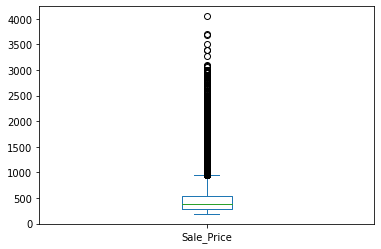

In [24]:
data1.Sale_Price.plot.box() # boxplot for the Sale_Price Column

In [25]:
data1.Profit.describe() #Description of the Profit column

count    97116.000000
mean       241.186251
std        268.251296
min        -34.000000
25%         59.000000
50%        155.000000
75%        350.000000
max       3860.000000
Name: Profit, dtype: float64

<AxesSubplot:>

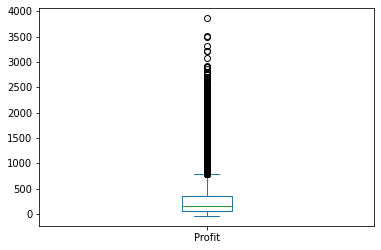

In [26]:
data1.Profit.plot.box() #Boxplot of the description column

In [27]:
data1.groupby('Sneaker_Name')[['Profit_Percent']].mean().sort_values(['Profit_Percent'], ascending = False) # Ranking sneakers name with the most profit percentage

,Profit_Percent
Sneaker_Name,
Air-Jordan-1-Retro-High-Off-White-White,861.089625
Air-Jordan-1-Retro-High-Off-White-Chicago,831.473684
Nike-Air-Presto-Off-White,673.220749
Adidas-Yeezy-Boost-350-Low-Turtledove,665.830882
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,550.344086
Nike-Blazer-Mid-Off-White-Wolf-Grey,504.580049
Nike-Blazer-Mid-Off-White,435.521813
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,405.757143
Adidas-Yeezy-Boost-350-Low-Moonrock,398.355000


In [28]:
data1.groupby('Sneaker_Name').Sale_Price.agg(['min', 'max']) #Each Sneaker Name with the minimum sale price and maximum sale price

,min,max
Sneaker_Name,,
Adidas-Yeezy-Boost-350-Low-Moonrock,730,2000
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,741,1470
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,721,1300
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,675,1455
Adidas-Yeezy-Boost-350-Low-Turtledove,1042,2300
Adidas-Yeezy-Boost-350-Low-V2-Beluga,528,1490
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,200,840
Adidas-Yeezy-Boost-350-V2-Blue-Tint,286,2000
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,500,1095
